# Synopsis

We're going to work on a mini-project using real data on college majors that will reinforce all of the skills that we have learned up to this point.

# Let's pull all the strings together!

We can make plots, import libraries, write functions, read files, and, generally, just program like a unicorn.

Let's work on a fun data problem together that most of us will relate to. I've gone and pulled data from [fivethirtyeight](fivethirtyeight.com) about the employability of recent college graduates. The files are in the `../Data/Day4-Dictionaries/College-Majors/` folder and each major is separated into a separate file like `recent_MAJOR.csv`.

When we look at a single file it is like this:                     

`
Rank,Major_code,Major,Major_category,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
20,3201,COURT REPORTING,Law & Public Policy,1148,14,877,271,0.236062718,930,808,223,808,11,0.011689692,54000,50000,54000,402,528,144
30,5402,PUBLIC POLICY,Law & Public Policy,5978,55,2695,905,0.251388889,4547,4163,1306,2776,670,0.128426299,50000,35000,70000,1550,1871,340`

So the first row is a header and then the other rows are the variables.

First, let's write a function to read one file, we'll use the `recent_Arts.csv` file.

The function should produce each row of real values (so not the header) as a dictionary (so pair it with the header). So like this:

    {'Rank' : 20,
     'Major_code' : 3201,
     'Major': 'COURT REPORTING',
     ...
    }
    
And then return each of these "line dictionaries" as a list for the file

    [ {'Rank': 20, ... }, {'Rank': 30, ..}]

In [2]:
import os
%matplotlib inline

In [43]:
file=open(os.path.join('..', 'Data', 'Day4-Dictionaries', 'College-Majors', 'recent_Physical Sciences.csv') )

lines=file.readlines()
keys=lines[0].strip('\n').split(',')
print(len(keys))
mylist=[]
for line in lines[1:]:
    values=line.strip('\n').split(',')
    if len(keys)!=len(values):
        mylist_of_string=mystring.strip('\n').split(',')
        major_category=mylist_of_string[2]+mylist_of_string[3]+mylist_of_string[4]
        mylist_of_string.remove(mylist_of_string[3])
        mylist_of_string.remove(mylist_of_string[3])
        mylist_of_string[2]=major_category.strip('"')
        mylist_of_string
    else:
        mydict=dict(zip(keys,values))
    mylist.append(mydict)

21
40,5102,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES",Physical Sciences,2116,31,7575,5727,0.430536761,1778,1392,579,1115,137,0.07154047,46000,38000,53000,162,1475,124



In [46]:
mystring='40,5102,"NUCLEAR, INDUSTRIAL RADIOLOGY, AND BIOLOGICAL TECHNOLOGIES",Physical Sciences,2116,31,7575,5727,0.430536761,1778,1392,579,1115,137,0.07154047,46000,38000,53000,162,1475,124'

In [117]:
import numpy as np

In [121]:
#Make this function work

def read_major_file(path):
    '''
    input:
        path - name of file containing csv of recent grad performance for a major
    output:
        majors_list - list of dictionaries, where every dictionary is a single major
    '''
    file=open(path)
    majors_list = []
    lines=file.readlines()
    keys=lines[0].strip('\n').split(',')
    mylist=[]
    for line in lines[1:]:
        values=line.strip('\n').split(',')
        if len(keys)!=len(values):
            major_category=values[2]+values[3]+values[4]
            values.remove(values[3]) # Remove 3
            values.remove(values[3]) # Remove former 4
            values[2]=major_category.strip('"')
        # Convert numbers to float 
        mydict=dict()
        for i,key in enumerate(keys):
            #print(i,key,values[i])
            if key!='Major' and key!='Major_category':
                try:
                    mydict[key]=float(values[i])
                except ValueError:
                    mydict[key]=None
            else:
                mydict[key]=values[i] 
           
        majors_list.append(mydict)
    return majors_list

read_major_file(os.path.join('..', 'Data', 'Day4-Dictionaries', 'College-Majors', 'recent_Industrial Arts & Consumer Services.csv') )

[{'Rank': 27.0,
  'Major_code': 5601.0,
  'Major': 'CONSTRUCTION SERVICES',
  'Major_category': 'Industrial Arts & Consumer Services',
  'Total': 18498.0,
  'Sample_size': 295.0,
  'Men': 2662.0,
  'Women': 1385.0,
  'ShareWomen': 0.342228811,
  'Employed': 16318.0,
  'Full_time': 15690.0,
  'Part_time': 1751.0,
  'Full_time_year_round': 12313.0,
  'Unemployed': 1042.0,
  'Unemployment_rate': 0.060023041,
  'Median': 50000.0,
  'P25th': 36000.0,
  'P75th': 60000.0,
  'College_jobs': 3275.0,
  'Non_college_jobs': 5351.0,
  'Low_wage_jobs': 703.0},
 {'Rank': 74.0,
  'Major_code': 3801.0,
  'Major': 'MILITARY TECHNOLOGIES',
  'Major_category': 'Industrial Arts & Consumer Services',
  'Total': 124.0,
  'Sample_size': 4.0,
  'Men': 1756.0,
  'Women': 1323.0,
  'ShareWomen': 0.429684963,
  'Employed': 0.0,
  'Full_time': 111.0,
  'Part_time': 0.0,
  'Full_time_year_round': 111.0,
  'Unemployed': 0.0,
  'Unemployment_rate': None,
  'Median': 40000.0,
  'P25th': 40000.0,
  'P75th': 40000.0,
  

## Great!

Now what we should do is read all of the files for the recent majors. Remember our friend `glob`? Also, there are other files in that directory so we'll need to use a pattern, maybe something like `recent*csv`.

In [122]:
import glob
glob_path=glob.glob(os.path.join('..', 'Data', 'Day4-Dictionaries', 'College-Majors', 'recent*.csv'))
majors_list=[]
for path in glob_path:
    print(path)
    result=read_major_file(path)
    majors_list.append(result)

../Data/Day4-Dictionaries/College-Majors/recent_Business.csv
../Data/Day4-Dictionaries/College-Majors/recent_Engineering.csv
../Data/Day4-Dictionaries/College-Majors/recent_Physical Sciences.csv
../Data/Day4-Dictionaries/College-Majors/recent_Agriculture & Natural Resources.csv
../Data/Day4-Dictionaries/College-Majors/recent_Arts.csv
../Data/Day4-Dictionaries/College-Majors/recent_Humanities & Liberal Arts.csv
../Data/Day4-Dictionaries/College-Majors/recent_Social Science.csv
../Data/Day4-Dictionaries/College-Majors/recent_Industrial Arts & Consumer Services.csv
../Data/Day4-Dictionaries/College-Majors/recent_Interdisciplinary.csv
../Data/Day4-Dictionaries/College-Majors/recent_Computers & Mathematics.csv
../Data/Day4-Dictionaries/College-Majors/recent_Health.csv
../Data/Day4-Dictionaries/College-Majors/recent_Law & Public Policy.csv
../Data/Day4-Dictionaries/College-Majors/recent_Psychology & Social Work.csv
../Data/Day4-Dictionaries/College-Majors/recent_Education.csv
../Data/Day4-Di

In [128]:
#Write a function to read in all majors
def read_all_majors(glob_path):
    '''
    input:
        glob_path - the path to search for the major files
    output:
        majors_list - list of dictionaries, a single dictionary for each major 
    '''
    paths=glob.glob(glob_path)
    majors_list=[]
    for path in paths:
        result=read_major_file(path)
        majors_list.append(result)
    return majors_list

all_majors=read_all_majors( os.path.join('..', 'Data', 'Day4-Dictionaries', 'College-Majors','recent*.csv') )

Now let's work on plotting. I would like to compare the Employed versus Unemployed for each major.

## What is a good plot to show that?

In [146]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Unemployed')

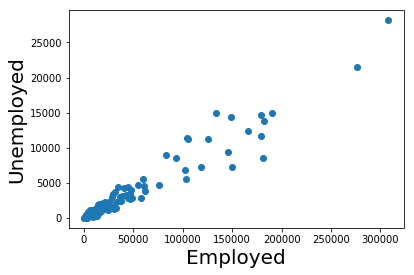

In [153]:
##Plot the Employed vs Unemployed
employed=[]
unemployed=[]
for major_category in all_majors:
    for major in major_category:
        employed.append(major['Employed'])
        unemployed.append(major['Unemployed'])
        
plt.scatter(employed,unemployed)
plt.xlabel('Employed',fontsize=20)
plt.ylabel('Unemployed',fontsize=20)

Great! But that plot is a bit hard to interpret that way.  We should probably color the majors by their group, that way we can look at broader patterns.

I wonder how we can change our plot to do that... ([hint](http://stackoverflow.com/search?q=matplotlib+scatter+color))

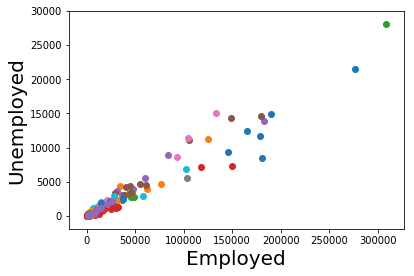

In [186]:
##Color by groups
for major_category in all_majors:
    employed=[]
    unemployed=[]
    for major in major_category:
        employed.append(major['Employed'])
        unemployed.append(major['Unemployed'])     
    plt.scatter(employed,unemployed)
    plt.xlabel('Employed',fontsize=20)
    plt.ylabel('Unemployed',fontsize=20)

# Now let's move to a group level analysis

I want to compare the fraction of employed people given each major category. 

We should plot the average and standard deviation for each group.

[Does python have a standard deviation function?](http://lmgtfy.com/?q=python+standard+deviation)

In [155]:
import numpy as np

'Communications & Journalism'

In [182]:
#Plot the group averages and standard deviations
media=[]
desvio=[]
categories_names=[]
for major_category in all_majors:
    categories_names.append(major_category[0]['Major_category'])
    employed=[]
    unemployed=[]
    for major in major_category:
        employed.append(major['Employed'])
        unemployed.append(major['Unemployed']) 
    media.append([np.mean(employed),np.mean(unemployed)])
    desvio.append([np.std(employed),np.std(unemployed)])

In [172]:
employed_mean=np.transpose(media)[0]
unemployed_mean=np.transpose(media)[1]
employed_std=np.transpose(desvio)[0]
unemployed_std=np.transpose(desvio)[1]

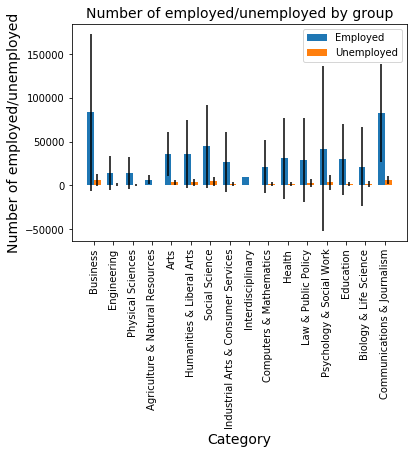

In [184]:
ind = np.arange(len(employed_mean))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, employed_mean, width, yerr=employed_std,
                label='Employed')
rects2 = ax.bar(ind + width/2, unemployed_mean, width, yerr=unemployed_std,
                label='Unemployed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of employed/unemployed',fontsize=14)
ax.set_xlabel('Category',fontsize=14)

ax.set_title('Number of employed/unemployed by group',fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(categories_names,rotation=90)
ax.legend()

Are these group averages significantly different from each other?

To test if any one of these groups differs from all of these groups we can use an [ANOVA test](https://en.wikipedia.org/wiki/Analysis_of_variance)

I'll cut out the intermediate googling, and tell you that python has the [ANOVA test in the SciPy package](http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.f_oneway.html)

In [209]:
#Test to see if the groups all have the same population mean
category_employed=[]
category_unemployed=[]
for major_category in all_majors:
    employed=[]
    unemployed=[]
    for major in major_category:
        employed.append(major['Employed'])
        unemployed.append(major['Unemployed']) 
    category_employed.append(employed)
    category_unemployed.append(unemployed)

In [210]:
from scipy import stats

In [212]:
stats.f_oneway(*category_employed)

F_onewayResult(statistic=1.9640512058789068, pvalue=0.02099887134728745)

To find out what groups significantly differ we can use pairwise t-tests to compare the samples


SciPy has the [t-test for two samples too](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html)

How can we test each pair of groups? Which groups differ significantly from each other? (We'll ignore the fact that we should correct our p-values for the number of tests we're doing).

In [225]:
#Test the pairwise associations
for i in range(0, len(category_employed)):
    for j in range(0, len(category_employed)):
        if i >j:
            leni=len(category_employed[i])
            lenj=len(category_employed[j])
            min_len=min(leni,lenj)
            sample1=np.random.choice(category_employed[i],min_len,replace=False)
            sample2=np.random.choice(category_employed[i],min_len,replace=False)
            print(stats.ttest_rel(sample1, sample2))

Ttest_relResult(statistic=0.0504495325651921, pvalue=0.960594189383159)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=-0.7883255371962423, pvalue=0.445800663382695)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=-1.4975378508098602, pvalue=0.16847781543284177)
Ttest_relResult(statistic=0.2999388460717597, pvalue=0.7710358604903551)
Ttest_relResult(statistic=-0.5189109104251876, pvalue=0.6198195185903999)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=0.0, pvalue=1.0)
Ttest_relResult(statistic=-0.59